In [1]:
import random
import numpy
import math

from deap import base
from deap import creator
from deap import tools
from deap import algorithms
from deap import benchmarks

import matplotlib.pyplot as plt

In [2]:
creator.create("Fitness", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.Fitness)

In [4]:
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_float", random.uniform, -5.12, 5.12)
# Vetor de floats de 3 posições
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_float, 3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [5]:
toolbox.register("evaluate", benchmarks.sphere)
toolbox.register("mate", tools.cxOnePoint)# TwoPoint, Uniform, OnePoint
toolbox.register("mutate", tools.mutGaussian, mu=0.5, sigma=0.4, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

In [6]:
def main():
    random.seed(64)
    
    pop = toolbox.population(n=30)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=5000, 
                                   stats=stats, halloffame=hof, verbose=True)
    
    return pop, log, hof

gen	nevals	avg    	std   	min    	max    
0  	30    	28.0179	15.047	2.80483	67.9075
1  	18    	13.6864	8.33968	2.76899	29.6785
2  	24    	7.01314	5.94379	2.34014	25.45  
3  	14    	3.38302	1.72945	2.3043 	11.2246
4  	24    	2.63335	0.302383	2.3043 	3.72324
5  	19    	2.4162 	0.197349	2.07391	2.95475
6  	15    	2.28756	0.0954062	2.07391	2.53932
7  	19    	2.37096	0.474269 	2.03807	4.55202
8  	21    	2.15757	0.121038 	2.03807	2.34014
9  	20    	2.0823 	0.131899 	1.83871	2.43981
10 	20    	1.99973	0.0838214	1.80287	2.07391
11 	12    	1.91648	0.093689 	1.80287	2.20136
12 	26    	2.04831	1.00569  	1.80287	7.45432
13 	20    	1.82984	0.0441323	1.77916	2.02196
14 	25    	1.81586	0.064653 	1.77916	2.15632
15 	18    	1.82794	0.0968723	1.77916	2.17621
16 	17    	1.82096	0.139364 	1.77916	2.56236
17 	18    	1.79124	0.0200949	1.77916	1.88068
18 	26    	1.78005	0.00427137	1.77916	1.80287
19 	22    	1.88718	0.572521  	1.77916	4.9701 
20 	21    	1.77916	4.44089e-16	1.77916	1.77916
21 	17    	1.80688	0

AttributeError: 'AxesSubplot' object has no property 'xlabels'

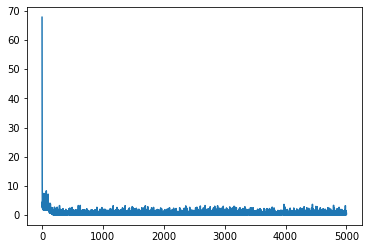

In [7]:

if __name__ == '__main__':
    results = main()
    
    gen = results[1].select('gen')
    
    best_per_gen = results[1].select('max')
    
    t = gen
    s = best_per_gen
    fig, ax = plt.subplots()
    ax.plot(t,s)
    ax.set(xlabel='Gerações', ylabel='Melhor Fitness')
    ax.grid()
    
    plt.show()